# AIM:
        

#### Using Depth first search, breadth first search, and uniform cost search algorithms to find the cheapest route to a     destination.


Uniform Cost Search is a graph search algorithm used in Artificial Intelligence to find the shortest path in a weighted graph. It works by expanding the node with the lowest cost and updating the costs of its neighbors


Finding each and every possible path from a source node to a goal node, along with their costs, is particularly valuable in scenarios where multiple solutions or alternative routes are relevant.

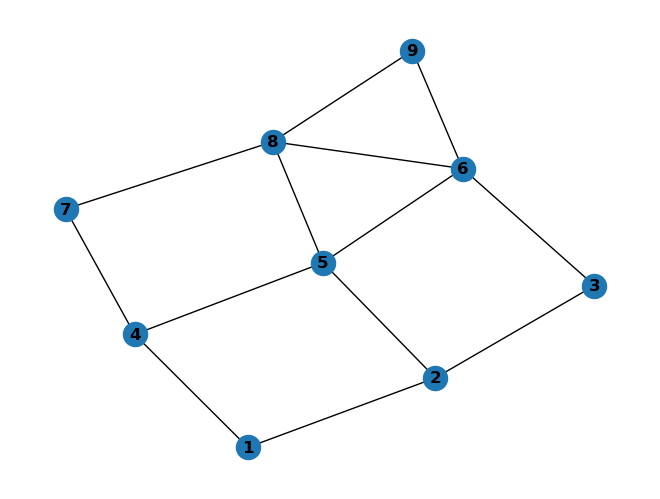

In [8]:
import networkx as nx
import math
import matplotlib.pyplot as plt
graph = {'1': ['2','4'],
           '2': ['1','5','3'],
           '3': ['2','6'],
           '4': ['1','5','7'],
           '5': ['2', '4', '8','6'],
           '6': ['3', '5', '9'],
           '7':['4', '8'],
           '8': ['7', '5', '6'],
           '9': ['8', '6'],}
G = nx.Graph()
for value in graph.keys():
    for i in range(len(graph[value])):
        G.add_edge(value,graph[value][i])
nx.draw(G, with_labels = True, font_weight = 'bold')




In [ ]:
class Environment:
    myGraph = {'1': ['2', '4'],
               '2': ['1', '5', '3'],
               '3': ['2', '6'],
               '4': ['1', '5', '7'],
               '5': ['2', '4', '8', '6'],
               '6': ['3', '5', '9'],
               '7': ['4', '8'],
               '8': ['7', '5', '6'],
               '9': ['8', '6'],}

    cost = {str(['1', '2']): '3', str(['1', '4']): '5',
            str(['2', '1']): '3', str(['2', '5']): '7', str(['2', '3']): '5',
            str(['3', '2']): '5', str(['3', '6']): '9',
            str(['4', '1']): '5', str(['4', '5']): '9', str(['4', '7']): '11',
            str(['5', '2']): '7', str(['5', '4']): '9', str(['5', '6']): '11', str(['5', '8']): '13',
            str(['6', '3']): '9', str(['6', '5']): '11', str(['6', '9']): '15',
            str(['7', '4']): '11', str(['7', '8']): '15',
            str(['8', '5']): '13', str(['8', '7']): '15', str(['8', '9']): '17',
            str(['9', '6']): '15', str(['9', '8']): '17'}

    start = '1'
    goal = '7'


class Agent(Environment):
    # depth first search
    def DFS(self, graph, start, goal):
        stack = [(start, [start])]
        p = []
        while stack:
            (vertex, path) = stack.pop()
            for next_vertex in set(graph[vertex]) - set(path):
                if next_vertex == goal:
                    p.append(path + [next_vertex])
                else:
                    stack.append((next_vertex, path + [next_vertex]))
        return p

    # breadth first search
    def BFS(self, graph, start, goal):
        queue = [(start, [start])]
        p = []
        while queue:
            (vertex, path) = queue.pop(0)
            for next_vertex in set(graph[vertex]) - set(path):
                if next_vertex == goal:
                    p.append(path + [next_vertex])
                    return p
                else:
                    queue.append((next_vertex, path 

In [10]:
+ [next_vertex]))

    def get_cost(self, path_to_cost):
        path_cost = 0
        i = 0
        while i < len(path_to_cost) - 1:
            l = [path_to_cost[i], path_to_cost[i + 1]]
            path_cost += int(self.cost[str(l)])
            i += 1
        return path_cost

    # uniform cost search
    def UCS(self, graph, start, goal):
        stack = [(start, [start])]
        p = []
        least_cost = float('inf')
        while stack:
            (vertex, path) = stack.pop()
            for next_vertex in set(graph[vertex]) - set(path):
                if next_vertex == goal:
                    path_cost = self.get_cost(path + [next_vertex])
                    print('UCS path:', path + [next_vertex], 'Path cost:', path_cost)
                    print()
                    if path_cost < least_cost:
                        least_cost = path_cost
                        p = path + [next_vertex]
                else:
                    stack.append((next_vertex, path + [next_vertex]))
        return p

    def __init__(self, env):
        print('DFS', self.DFS(env.myGraph, env.start, env.goal))
        print('BFS', self.BFS(env.myGraph, env.start, env.goal))
        print('UCS', self.UCS(env.myGraph, env.start, env.goal))


theEnvironment = Environment()
theAgent = Agent(theEnvironment)



DFS [['1', '4', '7'], ['1', '4', '5', '6', '9', '8', '7'], ['1', '4', '5', '8', '7'], ['1', '4', '5', '2', '3', '6', '9', '8', '7'], ['1', '2', '3', '6', '5', '8', '7'], ['1', '2', '3', '6', '5', '4', '7'], ['1', '2', '3', '6', '9', '8', '7'], ['1', '2', '3', '6', '9', '8', '5', '4', '7'], ['1', '2', '5', '6', '9', '8', '7'], ['1', '2', '5', '4', '7'], ['1', '2', '5', '8', '7']]
BFS [['1', '4', '7']]
UCS path: ['1', '4', '7'] Path cost: 16

UCS path: ['1', '4', '5', '6', '9', '8', '7'] Path cost: 72

UCS path: ['1', '4', '5', '8', '7'] Path cost: 42

UCS path: ['1', '4', '5', '2', '3', '6', '9', '8', '7'] Path cost: 82

UCS path: ['1', '2', '3', '6', '5', '8', '7'] Path cost: 56

UCS path: ['1', '2', '3', '6', '5', '4', '7'] Path cost: 48

UCS path: ['1', '2', '3', '6', '9', '8', '7'] Path cost: 64

UCS path: ['1', '2', '3', '6', '9', '8', '5', '4', '7'] Path cost: 82

UCS path: ['1', '2', '5', '6', '9', '8', '7'] Path cost: 68

UCS path: ['1', '2', '5', '4', '7'] Path cost: 30

UCS pa